In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import tqdm
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from torch.nn.utils.rnn import pad_sequence

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# train
VOCAB_SIZE = 3000
EMBEDDING_SIZE = 10
EPOCH = 20
BATCH_SIZE = 128
# display number
DISNUM = 50

# name
name = 'lstm-' + 'epo' + str(EPOCH) + 'ebd' + str(EMBEDDING_SIZE) + 'vcb' + str(VOCAB_SIZE)

In [9]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.vocab_size = vocab_size
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, batch_first=True, num_layers=num_layers)
        self.fc = nn.Linear(hidden_size, vocab_size)
        
    def forward(self, inputs):
        embedding = self.embedding(inputs)
        out, (hidden, cell) = self.lstm(embedding)
        out = self.fc(out)
        return F.log_softmax(out, dim=-1)

In [10]:
# read corpus from file
corpus = []
with open('norvel-cleaned.txt', 'r', encoding='utf-8') as f:
    for line in f:
        corpus.append(line.strip().split(' '))
# build word_to_ix
word_to_ix = {}
for sentence in corpus:
    for word in sentence:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
word_to_ix = {k: v if v < VOCAB_SIZE else VOCAB_SIZE for k, v in word_to_ix.items()}
word_to_ix['<UNK>'] = VOCAB_SIZE

In [11]:
inputs = []
targets = []
for sentence in corpus:
    input_sentence = [word_to_ix.get(word, VOCAB_SIZE) for word in sentence[:-1]]
    target_sentence = [word_to_ix.get(word, VOCAB_SIZE) for word in sentence[1:]]
    inputs.append(torch.tensor(input_sentence, dtype=torch.long))
    targets.append(torch.tensor(target_sentence, dtype=torch.long))

In [12]:
# train model
model = LSTM(VOCAB_SIZE+1, EMBEDDING_SIZE, 128, 1)
model.to(device)
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for epoch in range(EPOCH):
    total_loss = 0
    for i in tqdm.tqdm(range(0, len(corpus), BATCH_SIZE)):
        input = inputs[i:i+BATCH_SIZE]
        target = targets[i:i+BATCH_SIZE]
        model_input = pad_sequence(input, batch_first=True)
        model_target = pad_sequence(target, batch_first=True)
        model_input = model_input.to(device)
        model_target = model_target.to(device)
        model.zero_grad()
        log_probs = model(model_input)
        loss = loss_function(log_probs.view(-1, VOCAB_SIZE+1), model_target.view(-1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print('Epoch:', epoch, 'Loss:', total_loss)
word_vectors = np.array(model.embedding.weight.data.cpu())
torch.save(model.state_dict(), name + '.pth')

100%|██████████| 152/152 [00:09<00:00, 15.79it/s]


Epoch: 0 Loss: 258.729694545269


100%|██████████| 152/152 [00:03<00:00, 38.24it/s]


Epoch: 1 Loss: 113.42916887998581


100%|██████████| 152/152 [00:03<00:00, 38.05it/s]


Epoch: 2 Loss: 107.26024627685547


100%|██████████| 152/152 [00:03<00:00, 38.05it/s]


Epoch: 3 Loss: 105.06938418745995


100%|██████████| 152/152 [00:04<00:00, 37.94it/s]


Epoch: 4 Loss: 103.63307249546051


100%|██████████| 152/152 [00:03<00:00, 38.06it/s]


Epoch: 5 Loss: 102.29100978374481


100%|██████████| 152/152 [00:04<00:00, 37.88it/s]


Epoch: 6 Loss: 101.02170526981354


100%|██████████| 152/152 [00:04<00:00, 37.92it/s]


Epoch: 7 Loss: 99.98726287484169


100%|██████████| 152/152 [00:04<00:00, 37.85it/s]


Epoch: 8 Loss: 99.16983184218407


100%|██████████| 152/152 [00:04<00:00, 37.78it/s]


Epoch: 9 Loss: 98.46924176812172


100%|██████████| 152/152 [00:04<00:00, 37.65it/s]


Epoch: 10 Loss: 97.85508120059967


100%|██████████| 152/152 [00:04<00:00, 37.64it/s]


Epoch: 11 Loss: 97.31354786455631


100%|██████████| 152/152 [00:04<00:00, 37.56it/s]


Epoch: 12 Loss: 96.79868279397488


100%|██████████| 152/152 [00:04<00:00, 37.61it/s]


Epoch: 13 Loss: 96.31284056603909


100%|██████████| 152/152 [00:04<00:00, 37.49it/s]


Epoch: 14 Loss: 95.8383411616087


100%|██████████| 152/152 [00:04<00:00, 37.50it/s]


Epoch: 15 Loss: 95.36842645704746


100%|██████████| 152/152 [00:04<00:00, 37.49it/s]


Epoch: 16 Loss: 94.90698575973511


100%|██████████| 152/152 [00:04<00:00, 37.77it/s]


Epoch: 17 Loss: 94.45182377099991


100%|██████████| 152/152 [00:04<00:00, 37.66it/s]


Epoch: 18 Loss: 94.00433149933815


100%|██████████| 152/152 [00:04<00:00, 37.58it/s]


Epoch: 19 Loss: 93.57267688214779


100%|██████████| 152/152 [00:04<00:00, 37.67it/s]


Epoch: 20 Loss: 93.163056448102


100%|██████████| 152/152 [00:04<00:00, 37.69it/s]


Epoch: 21 Loss: 92.77684587240219


100%|██████████| 152/152 [00:04<00:00, 37.67it/s]


Epoch: 22 Loss: 92.4122142791748


100%|██████████| 152/152 [00:04<00:00, 37.56it/s]


Epoch: 23 Loss: 92.06905913352966


100%|██████████| 152/152 [00:04<00:00, 37.59it/s]


Epoch: 24 Loss: 91.74885600805283


100%|██████████| 152/152 [00:04<00:00, 37.67it/s]


Epoch: 25 Loss: 91.451466396451


100%|██████████| 152/152 [00:04<00:00, 37.59it/s]


Epoch: 26 Loss: 91.17429666221142


100%|██████████| 152/152 [00:04<00:00, 37.59it/s]


Epoch: 27 Loss: 90.91402941942215


100%|██████████| 152/152 [00:04<00:00, 37.59it/s]


Epoch: 28 Loss: 90.66776345670223


100%|██████████| 152/152 [00:04<00:00, 37.51it/s]

Epoch: 29 Loss: 90.43222953379154


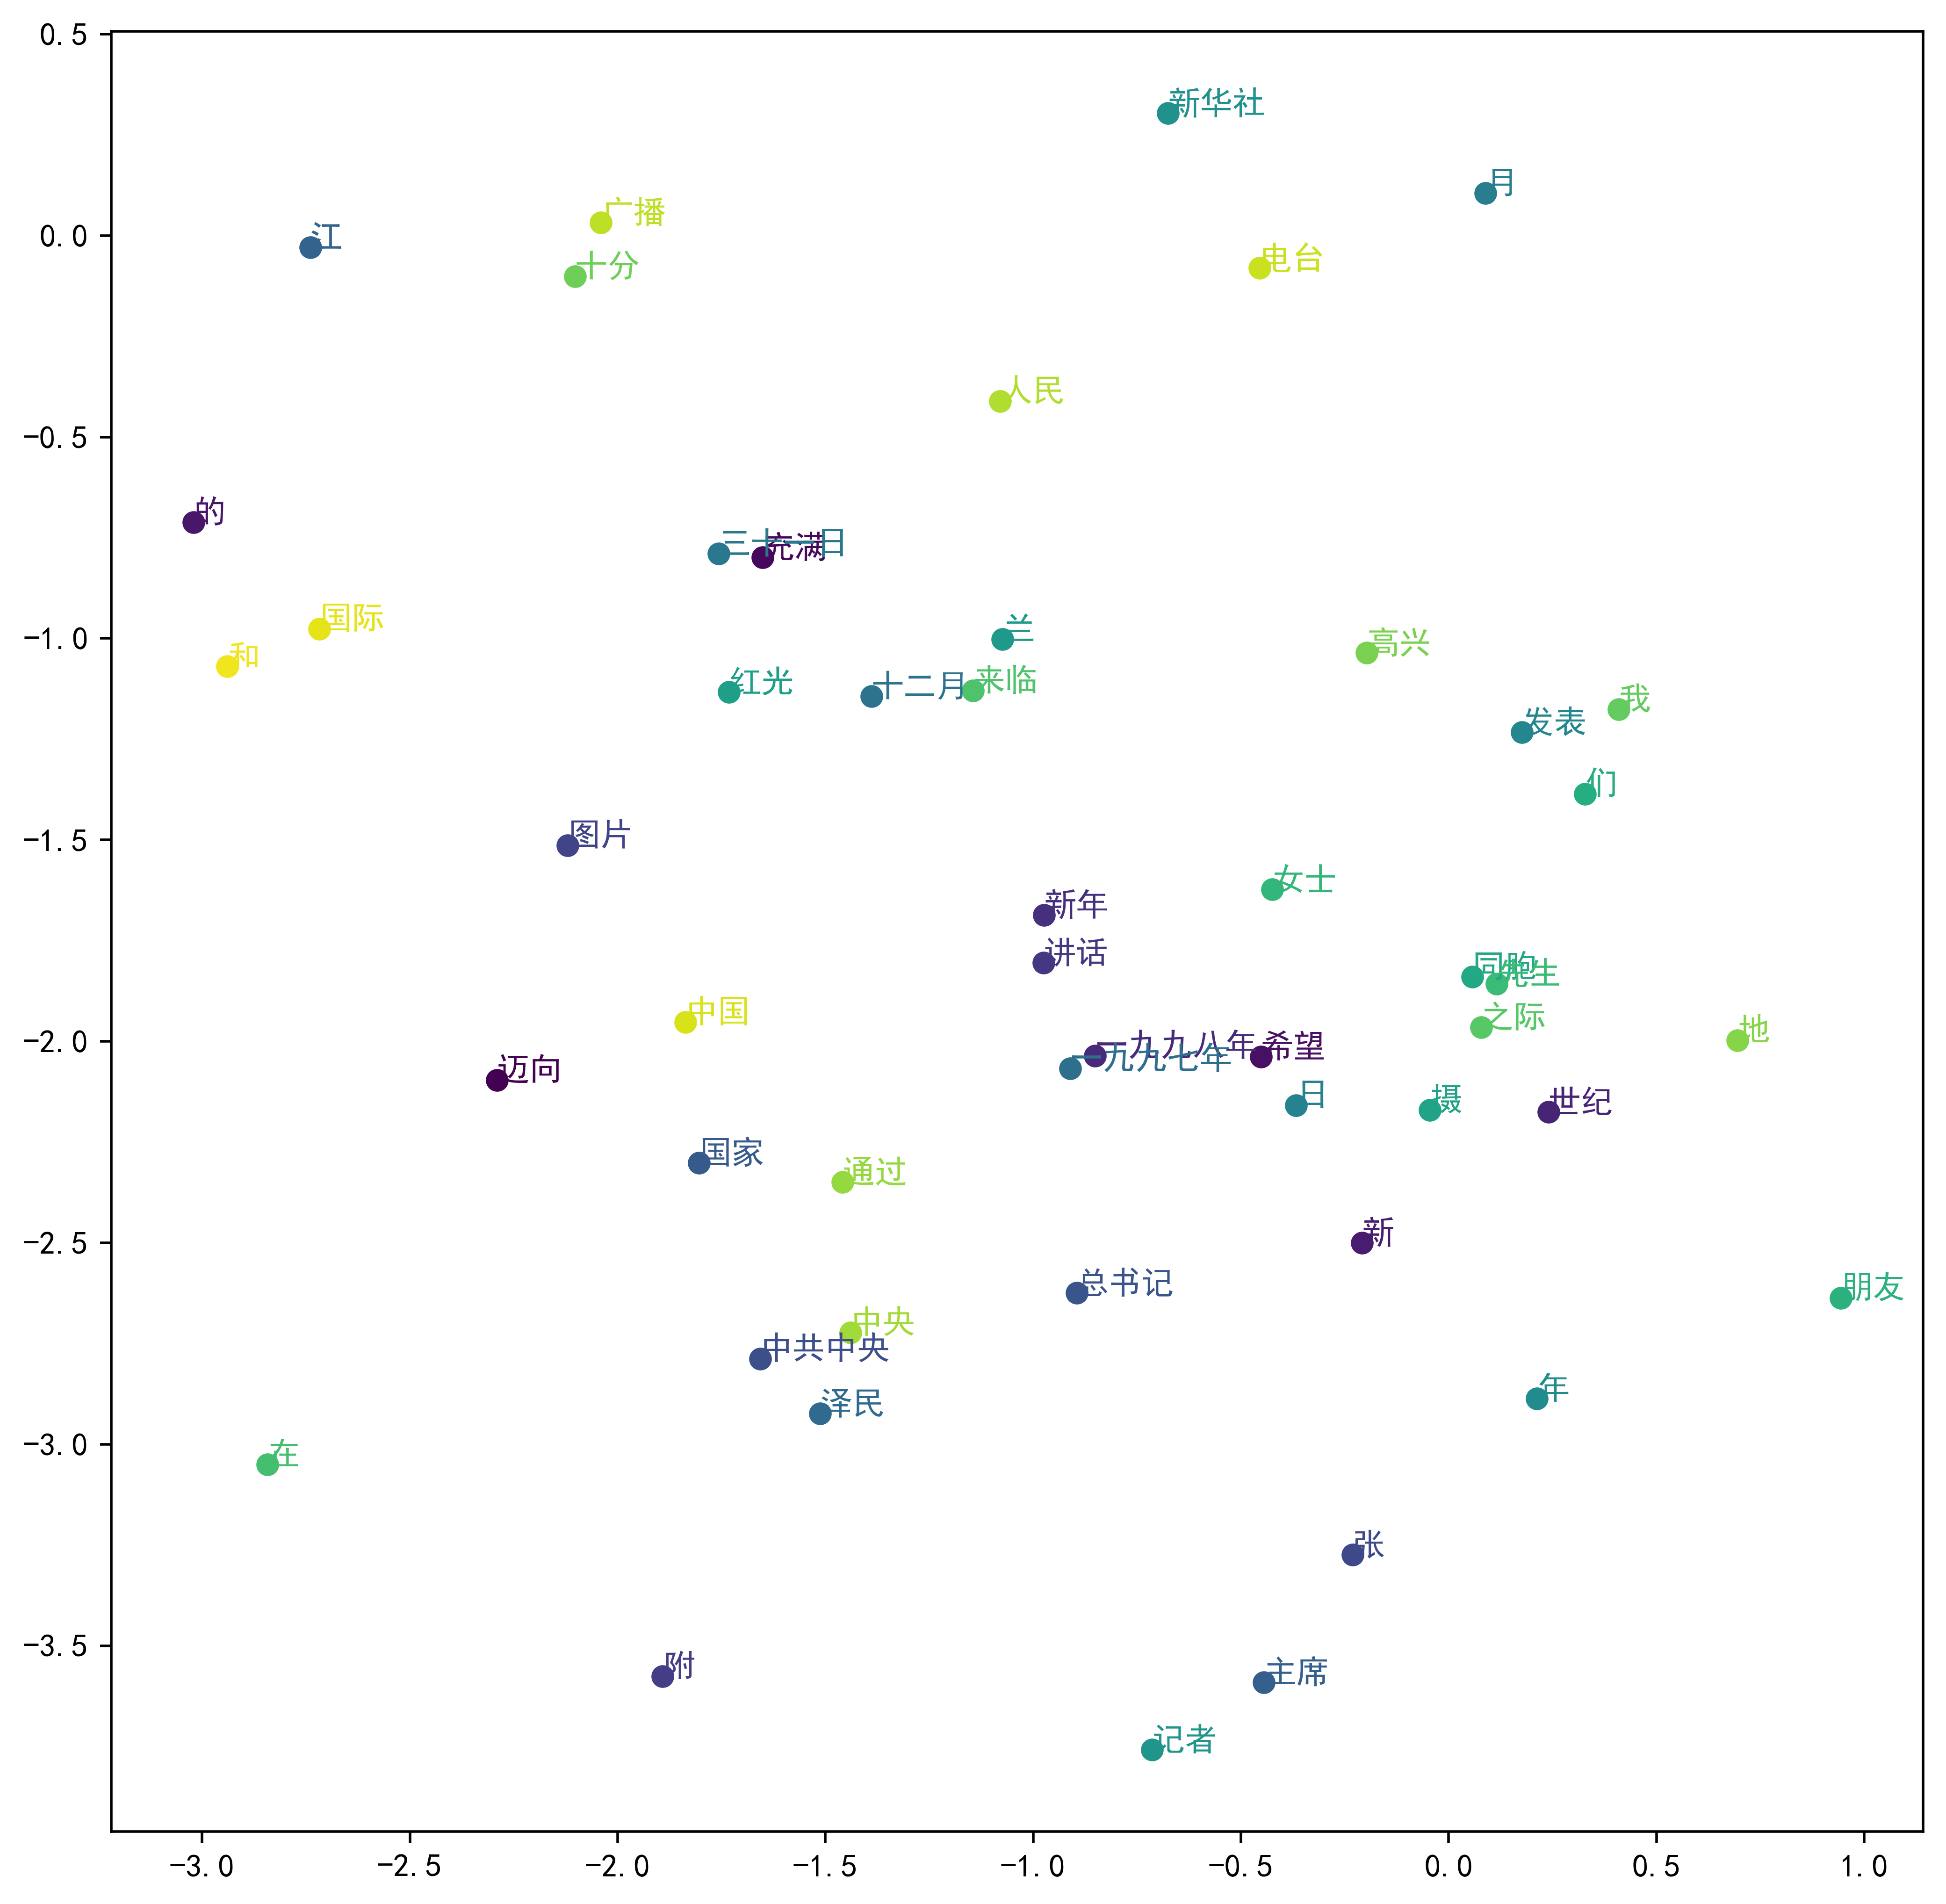

In [13]:
# tsne
tsne = TSNE(n_components=2, random_state=0)
word_vectors_tsne = tsne.fit_transform(word_vectors[:DISNUM])

# plot
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
fig, ax = plt.subplots(figsize=(10, 10), dpi=500)

cmap = plt.get_cmap('viridis')
# cmap = plt.get_cmap('tab10')
for i, word in enumerate(word_to_ix):
    if i == DISNUM:
        break
    color = cmap(i/DISNUM)
    ax.scatter(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1], color=color)
    ax.annotate(word, xy=(word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]), color=color)
plt.savefig(name + '.png')

In [14]:
import pandas as pd
import os
word_list = list(word_to_ix.keys())[::10][:20]
# get similar words using cosine similarity
def get_similar_words(word, n=10):
    if word not in word_to_ix:
        print('Word not in vocabulary')
        return
    word_vector = word_vectors[word_to_ix[word]]
    similarities = np.dot(word_vectors, word_vector) / (np.linalg.norm(word_vectors, axis=1) * np.linalg.norm(word_vector))
    sorted_indices = np.argsort(similarities)[::-1][1:n+1]
    similar_words = []
    similarity_scores = []
    for i in sorted_indices:
        similar_word = list(word_to_ix.keys())[list(word_to_ix.values()).index(i)]
        similarity = similarities[i]
        similar_words.append(similar_word)
        similarity_scores.append(similarity)
    df = pd.DataFrame({'Similar Words': similar_words, 'Similarity Scores': similarity_scores})
    if not os.path.exists(name):
        os.makedirs(name)
    df.to_excel(f'{name}/{name}_{word}.xlsx', index=False)
for word in word_list:
    get_similar_words(word)